In [5]:
# 默认嵌入到 notebook里面
%matplotlib inline 
import random # 随机梯度下降，随机初始化权重
import torch
from d2l import torch as d2l


In [6]:
def synthetic_data(w, b, num_examples):
    '''
        生成 y = Xw + b + 噪声
    '''
    # X 均值为0，方差为1，有num_examples个样本，len(w)列
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1)) # -1 表示行数自动推断

# 使用固定参数生成随机数据集
true_w = torch.tensor([2, -3.4]) 
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [7]:
print('features: ', features[0], '\nlabel: ', labels[0])

features:  tensor([ 0.8317, -0.3371]) 
label:  tensor([7.0235])


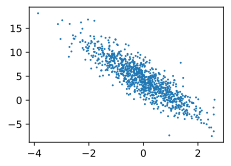

In [8]:
d2l.set_figsize()
# 需要先detach，才能转成numpy
d2l.plt.scatter(features[:, 1].detach().numpy(),
               labels.detach().numpy(), 1)

In [9]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 随机打乱
    random.shuffle(indices)
    # 每次返回batch_size个
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.2960, -1.1922],
        [ 0.7714,  0.7183],
        [-1.0064,  0.3485],
        [-0.2047, -0.0064],
        [ 0.0945, -0.4704],
        [-0.9741,  0.0859],
        [ 0.1555, -0.5729],
        [ 0.2872, -2.2283],
        [-0.3045,  0.9556],
        [ 1.4149, -0.3834]]) 
 tensor([[ 8.8503],
        [ 3.2997],
        [ 0.9988],
        [ 3.8011],
        [ 5.9879],
        [ 1.9398],
        [ 6.4561],
        [12.3277],
        [ 0.3301],
        [ 8.3258]])


In [10]:
# 均值为0， 方差为0.01
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [11]:
# 定义线性回归模型
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [12]:
# 定义损失函数
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2/2

In [13]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    # 此处的param包括w 和 b
    with torch.no_grad(): # 此处仅更新梯度，所以不需要进行计算（计算在训练过程）
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_() # 梯度清零

In [ ]:
def my_sgd(params, lr, batch_size, percent):
    """小批量随机梯度下降"""
    # 此处的param包括w 和 b
    with torch.no_grad():  # 此处仅更新梯度，所以不需要进行计算（计算在训练过程）
        for i in range(int(len(params) * percent)):
            param = params[i]
            param -= lr * param.grad / batch_size
            param.grad.zero_()  # 梯度清零


In [14]:
# 训练过程
lr = 0.01
num_epochs = 50
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # 将参数放入网络（net）中进行预测，并计算损失
        # l 的形状是（'batch_size', 1），一个向量
        l.sum().backward() # 计算梯度
        sgd([w, b], lr, batch_size) # 使用参数的梯度更新参数（此处最后一轮可能发生问题）
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 2.096789
epoch 2, loss 0.249616
epoch 3, loss 0.029809
epoch 4, loss 0.003606
epoch 5, loss 0.000474
epoch 6, loss 0.000098
epoch 7, loss 0.000054
epoch 8, loss 0.000048
epoch 9, loss 0.000047
epoch 10, loss 0.000047
epoch 11, loss 0.000047
epoch 12, loss 0.000047
epoch 13, loss 0.000047
epoch 14, loss 0.000047
epoch 15, loss 0.000047
epoch 16, loss 0.000047
epoch 17, loss 0.000047
epoch 18, loss 0.000047
epoch 19, loss 0.000047
epoch 20, loss 0.000047
epoch 21, loss 0.000047
epoch 22, loss 0.000047
epoch 23, loss 0.000047
epoch 24, loss 0.000047
epoch 25, loss 0.000047
epoch 26, loss 0.000047
epoch 27, loss 0.000047
epoch 28, loss 0.000047
epoch 29, loss 0.000047
epoch 30, loss 0.000047
epoch 31, loss 0.000047
epoch 32, loss 0.000047
epoch 33, loss 0.000047
epoch 34, loss 0.000047
epoch 35, loss 0.000047
epoch 36, loss 0.000047
epoch 37, loss 0.000047
epoch 38, loss 0.000047
epoch 39, loss 0.000047
epoch 40, loss 0.000047
epoch 41, loss 0.000047
epoch 42, loss 0.000047
e

In [15]:
print(f'w的估计误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b - b}')

w的估计误差：tensor([0.0007, 0.0001], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.0003], grad_fn=<RsubBackward1>)
